In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.columns = (['signal' , 'density'])

In [9]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='density'>

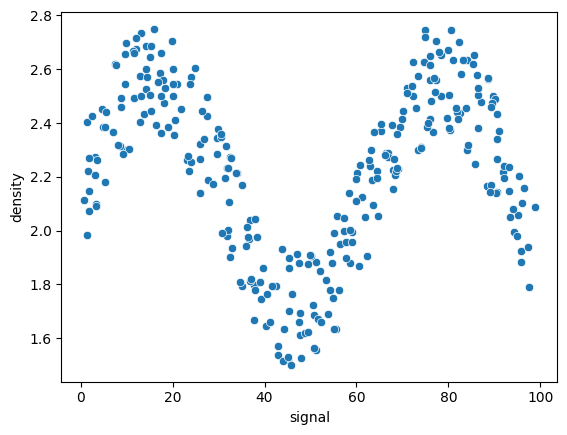

In [36]:
sns.scatterplot(data = df , x= 'signal' , y = 'density')

In [10]:
X = df['signal']
# Since we have only one features in this data if we try to fit this to our model then it will give you an error.
# error is  : Reshape your data either using [array.reshape(-1, 1) --> Here array means the values of 'signal' column in array format] 
#             if your data has a single feature or array.reshape(1, -1) if it contains a single sample(i.e. single row).

In [28]:
X = df['signal'].values.reshape(-1,1)

In [30]:
y = df['density']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression()

In [35]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [37]:
lr_preds = lr_model.predict(X_test)

In [41]:
lr_preds
# As we see all the preds are close to 2.22. If we find MAE , RMSE we will get pretty good result , but after plotting the our 
# LinearRegression line on scatterplot we will find our model is very poor.

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [57]:
lr_preds.shape

(30,)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(y_test , lr_preds)

0.211198973318633

In [45]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [54]:
signal_range = np.arange(0,100)

In [60]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

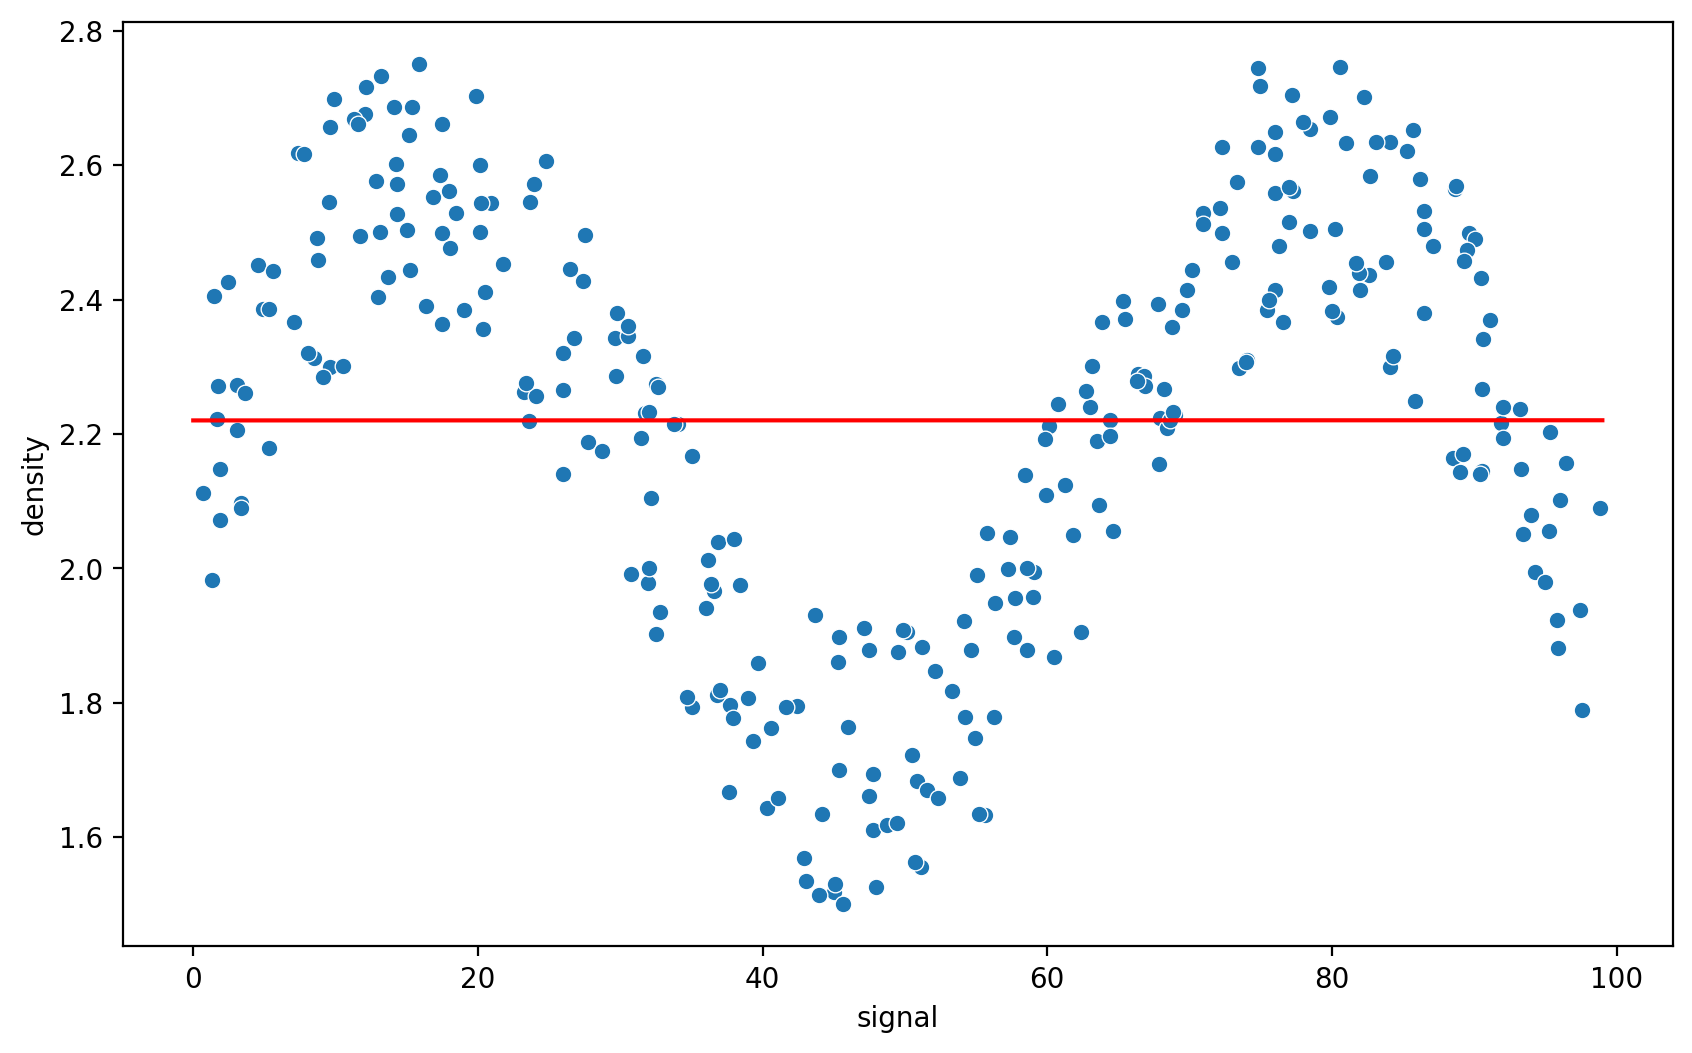

In [65]:
plt.figure(figsize = (10,6),dpi=200)
sns.scatterplot(data=df , x = 'signal' , y = 'density')
plt.plot(signal_range,signal_preds , color = 'r')

#### After plotting the curve we see that LinearRegression model is performing poorly

In [118]:
def run_model(model , X_train , y_train , X_test , y_test):
    
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    print('RMSE:',rmse)
    print('MAE:',mae)
    
    plt.figure(figsize = (10,6),dpi=200)
    sns.scatterplot(data=df , x = 'signal' , y = 'density')
    plt.plot(signal_range,signal_preds , color = 'r')
    

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
from sklearn.pipeline import make_pipeline

In [121]:
pipe = make_pipeline(PolynomialFeatures(degree = 6) , LinearRegression())

RMSE: 0.13807520083403252
MAE: 0.11969168049270058


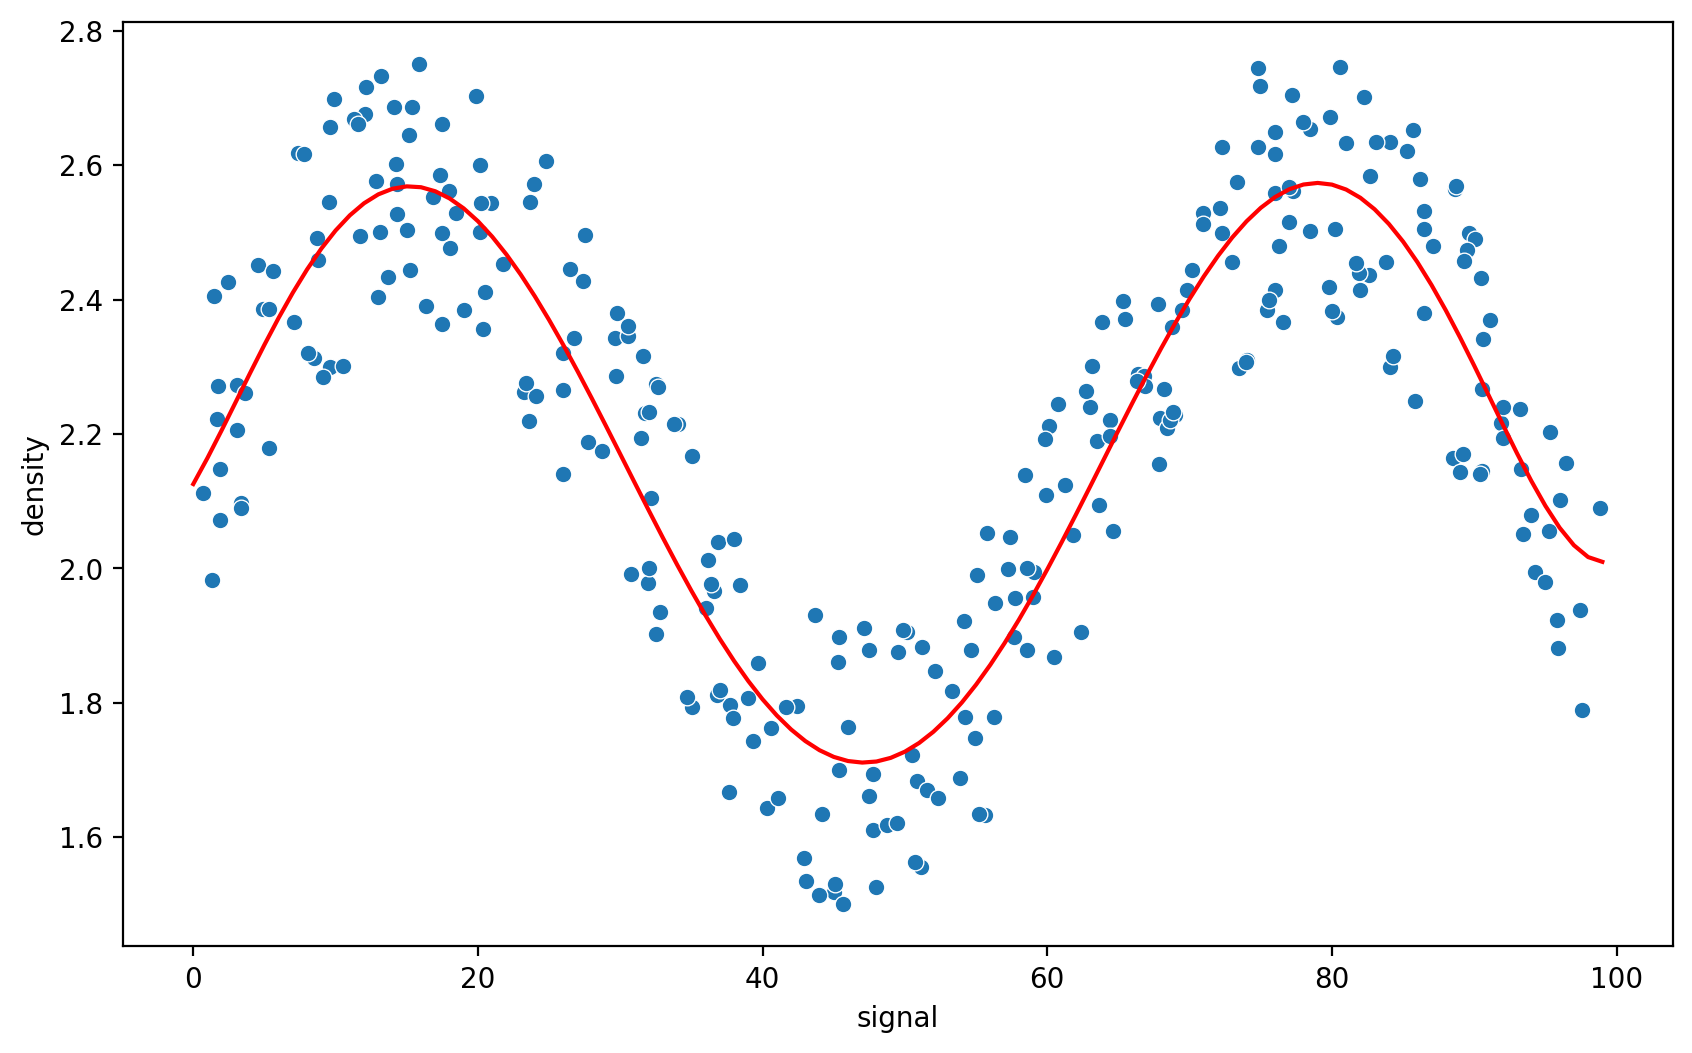

In [122]:
run_model(pipe , X_train , y_train , X_test , y_test)

### PolynomialRegression at deg = 6 is best fitted to this data when our signal range is upto "100" , but after 100                              PolynomialRegression at deg = 6 may not be best fitted to the data.

## KNN

In [123]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378
RMSE: 0.14030131751235314
MAE: 0.116848629154335
RMSE: 0.13730685016923647
MAE: 0.12198383614100558
RMSE: 0.1384265533347639
MAE: 0.12100558240138312
RMSE: 0.13277855732740926
MAE: 0.11635971693292672
RMSE: 0.1397499127378895
MAE: 0.1207030971917154
RMSE: 0.19545005360281248
MAE: 0.1570937980156112
RMSE: 0.21309029683672812
MAE: 0.16671472141169144


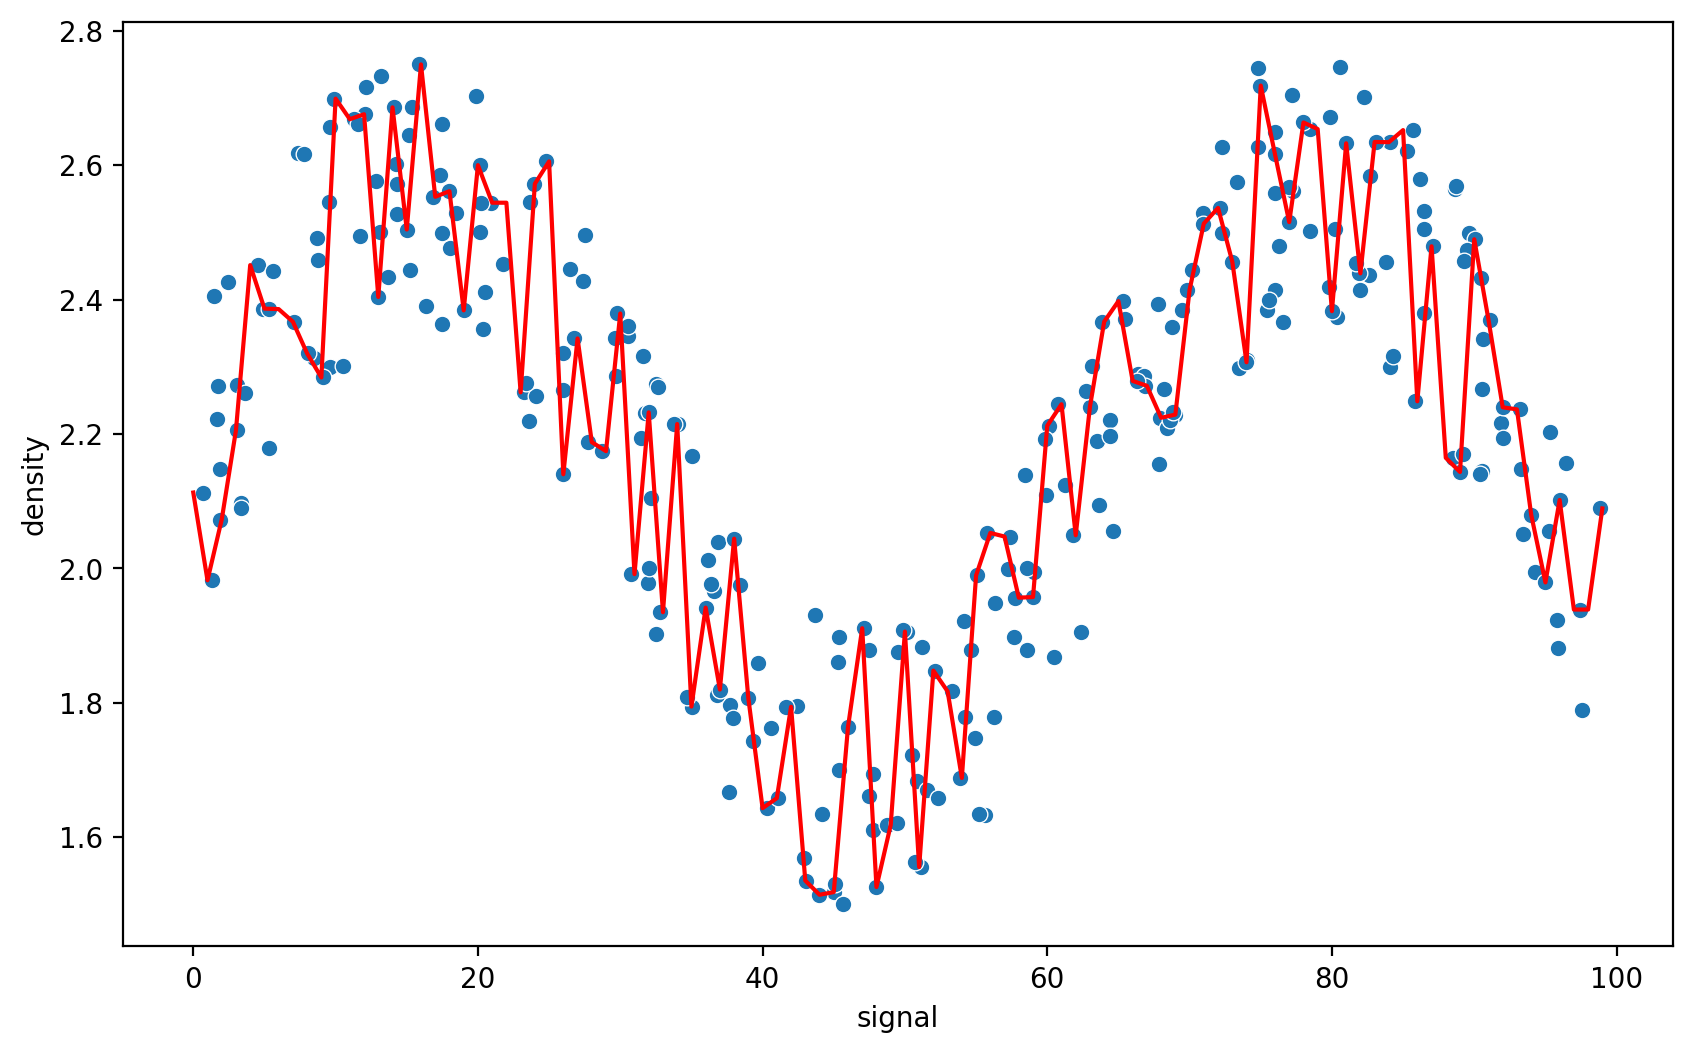

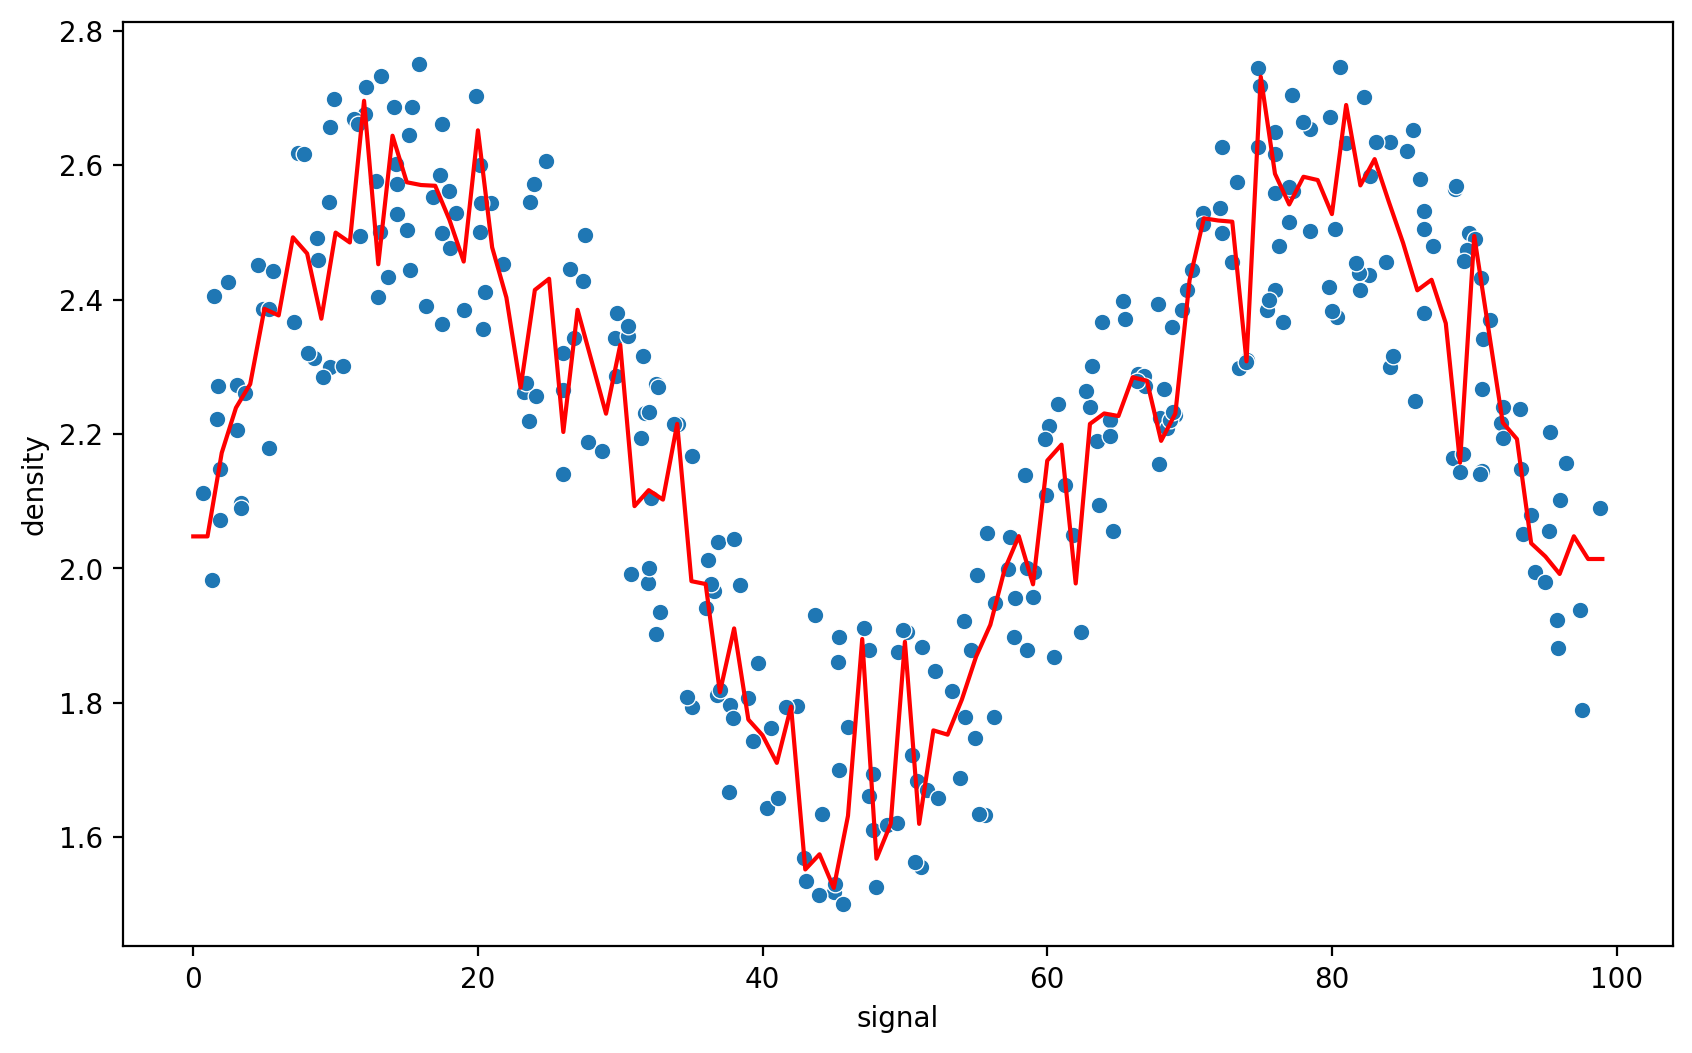

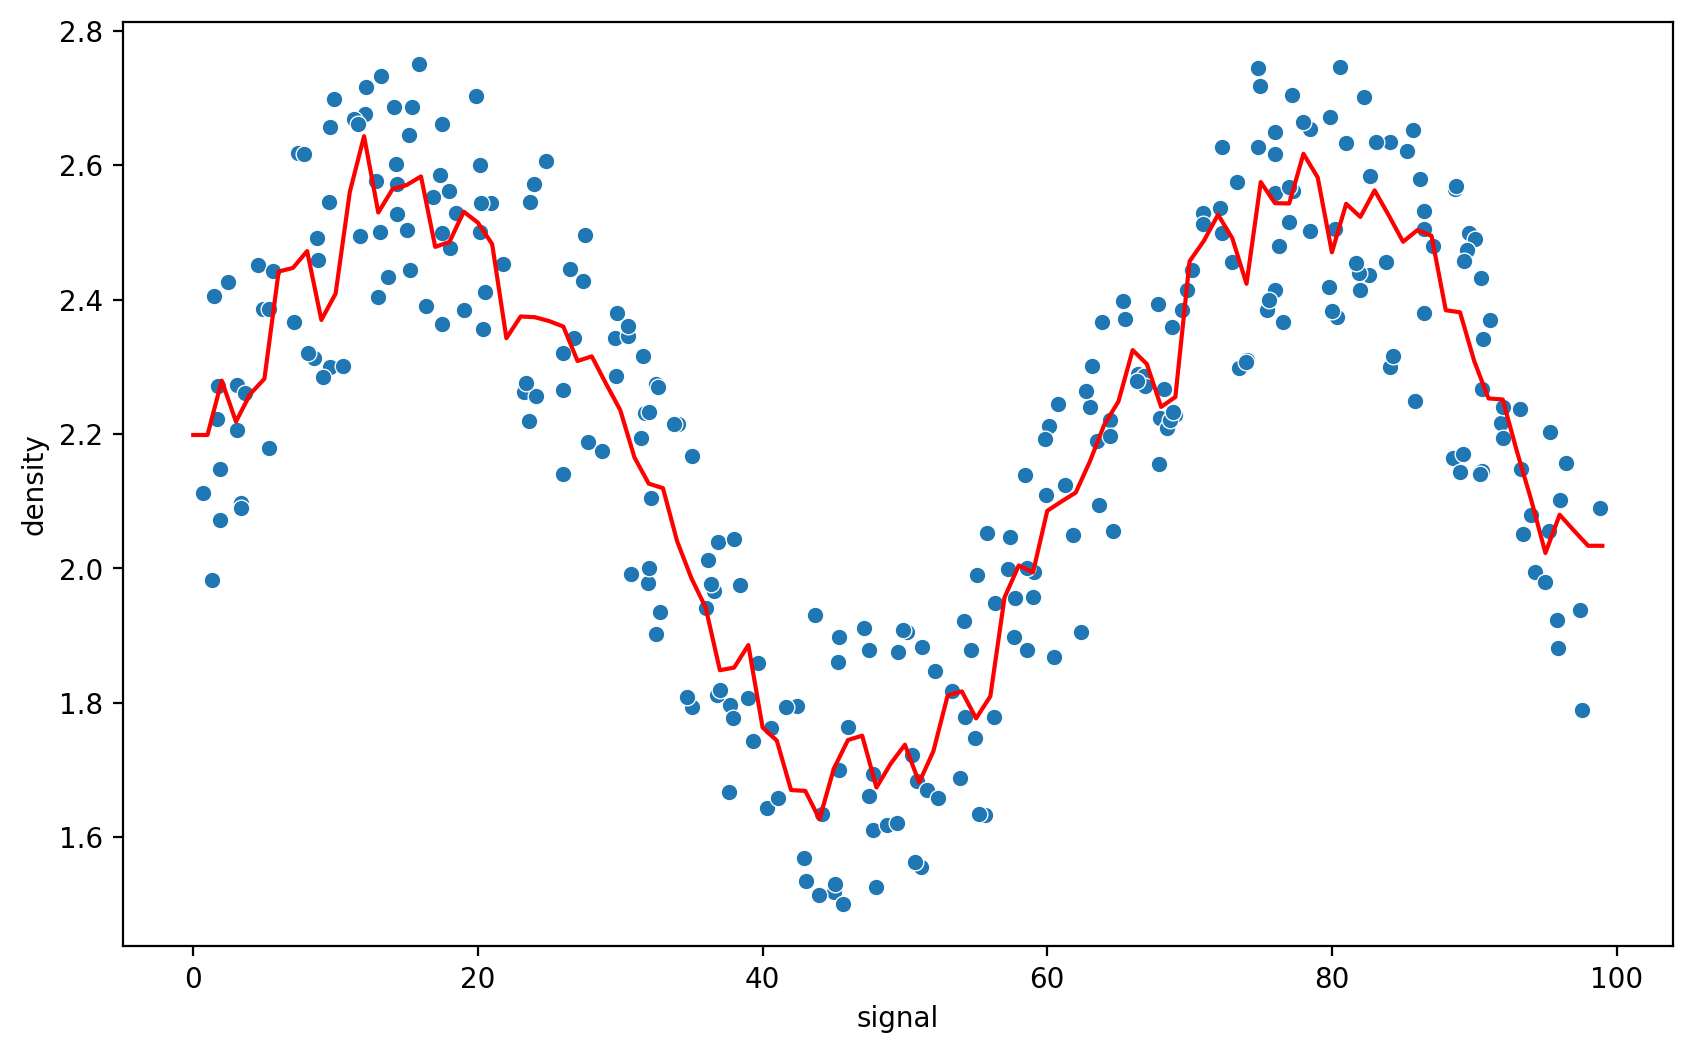

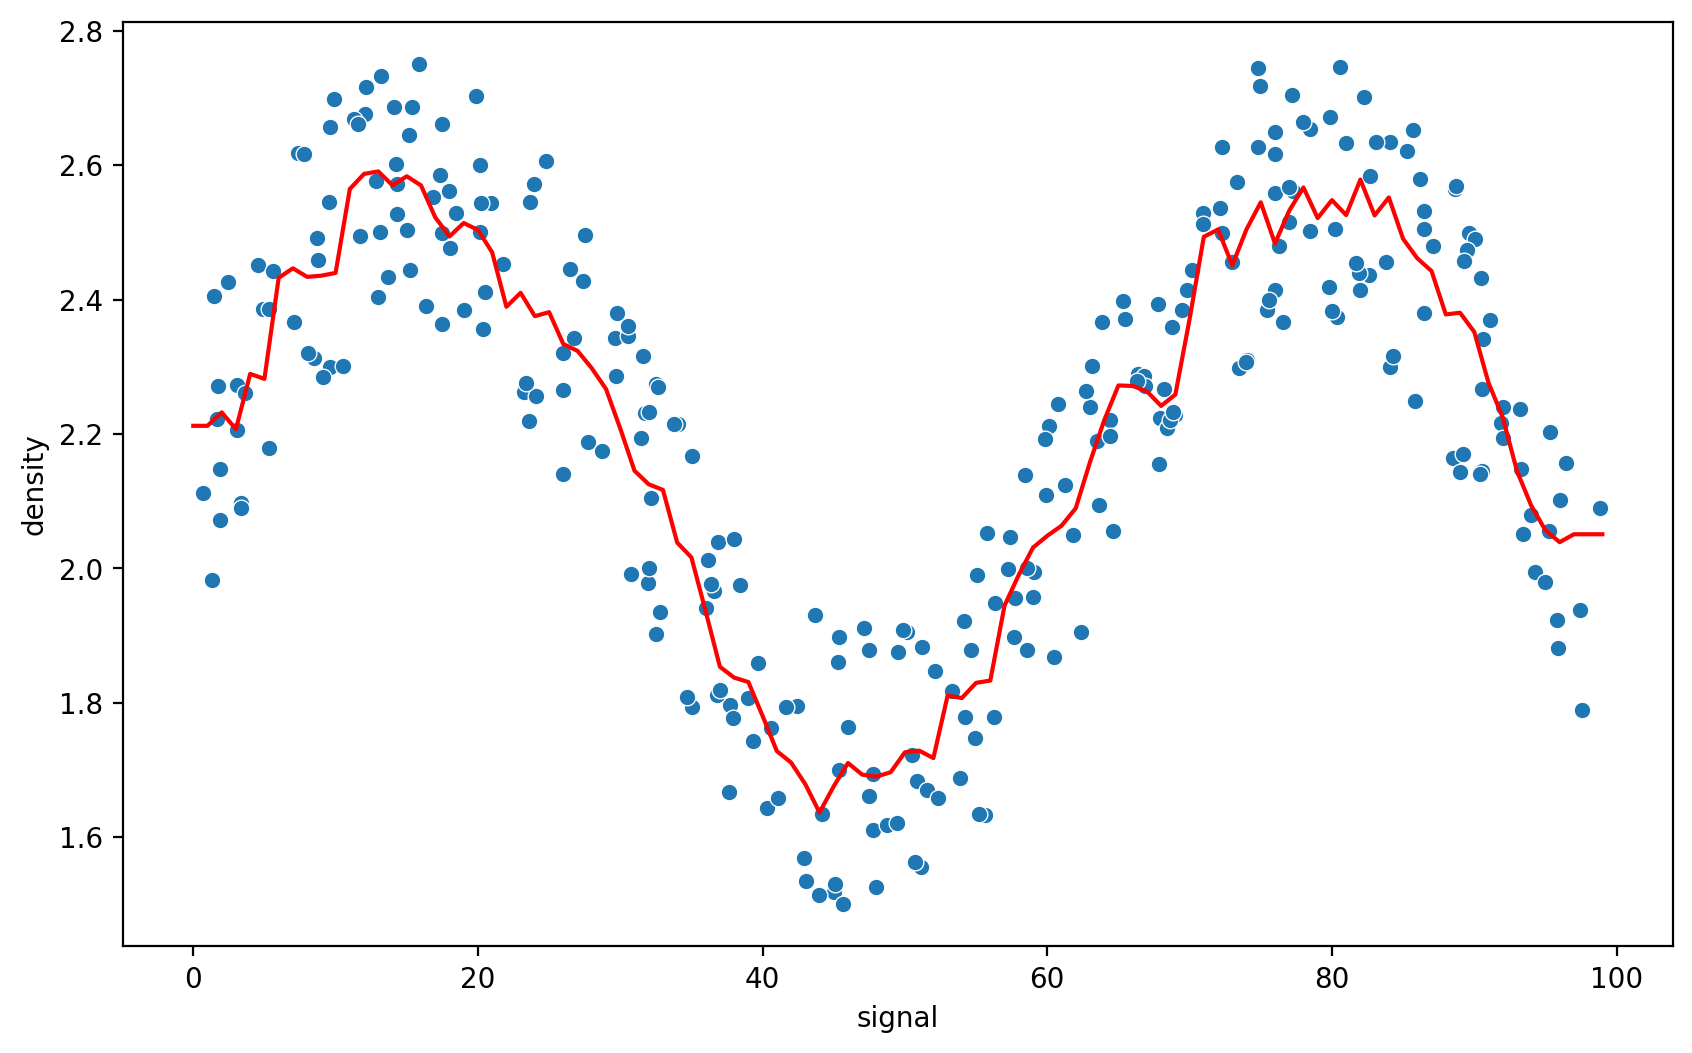

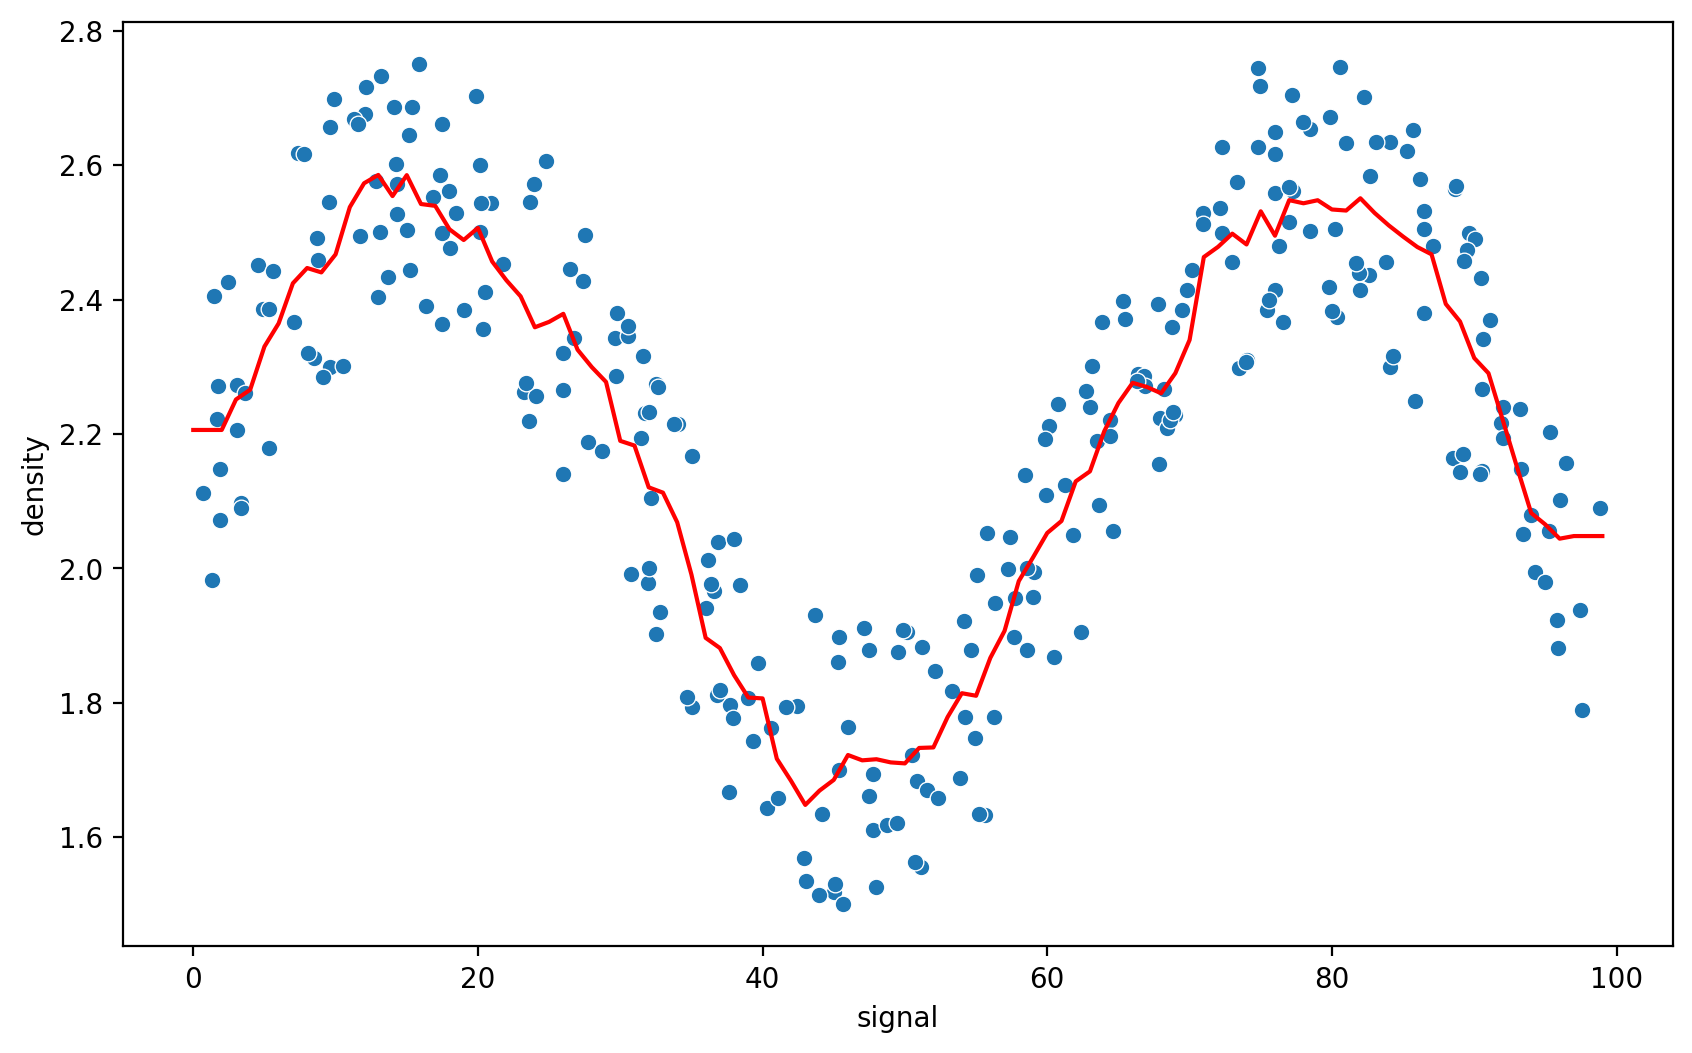

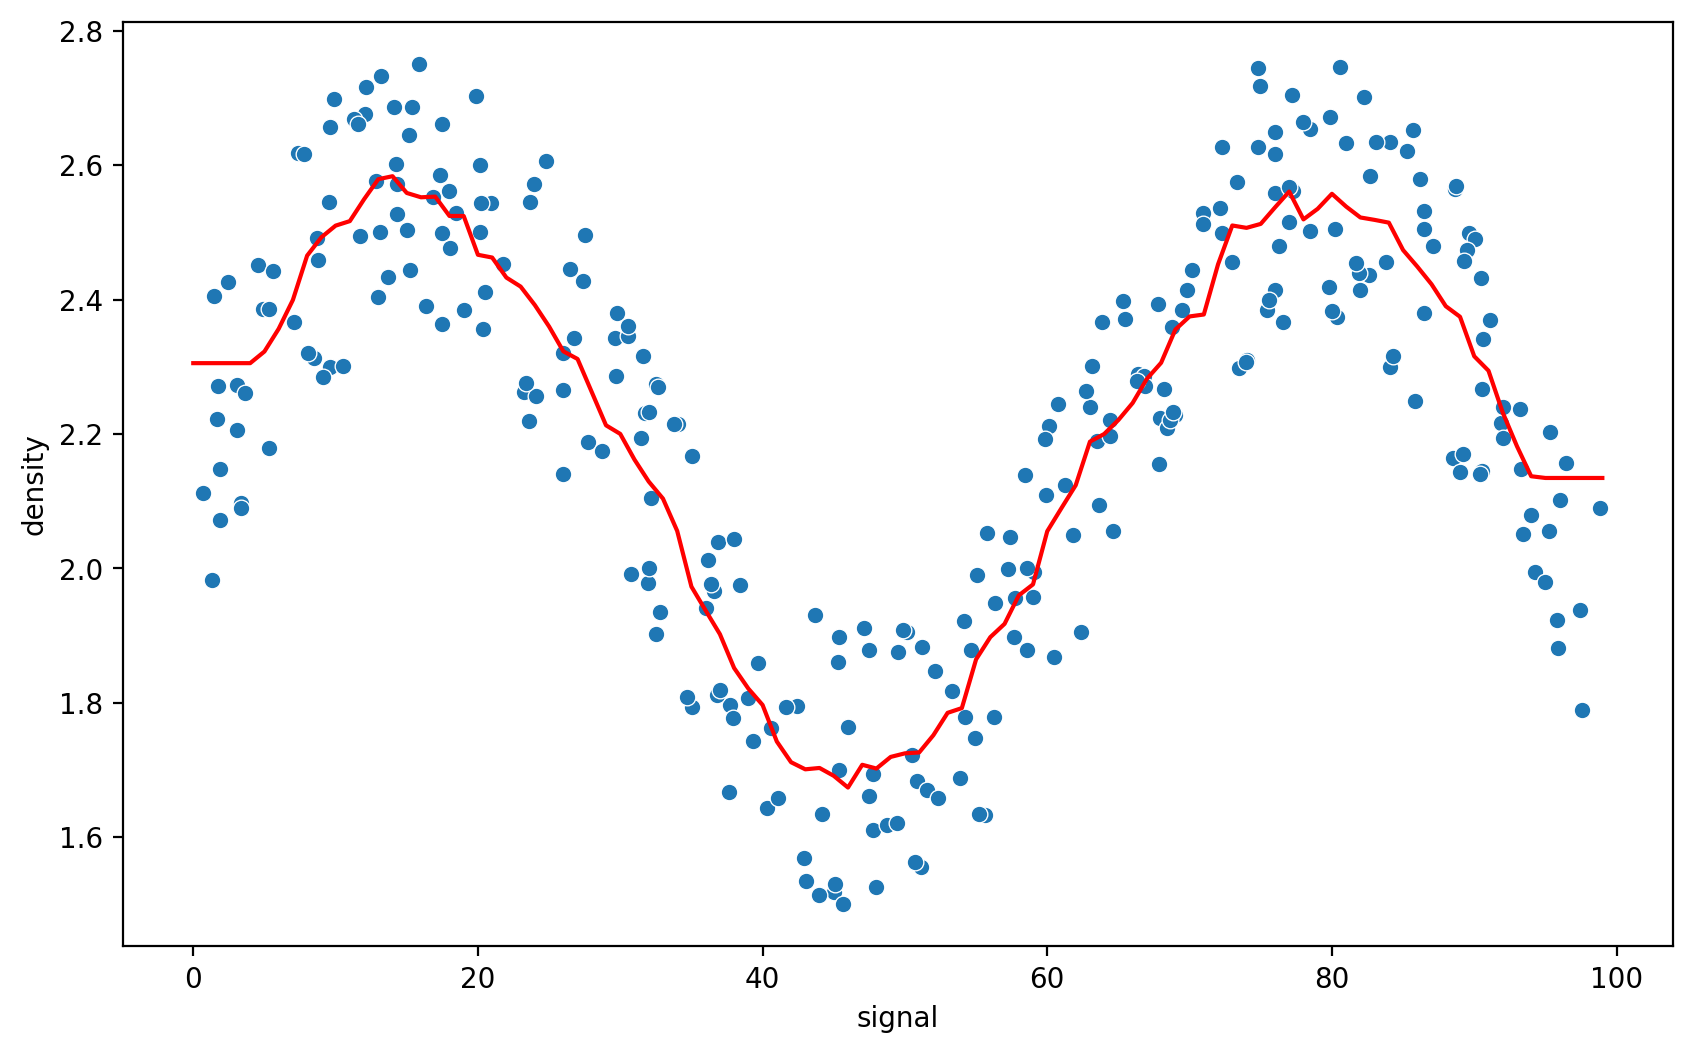

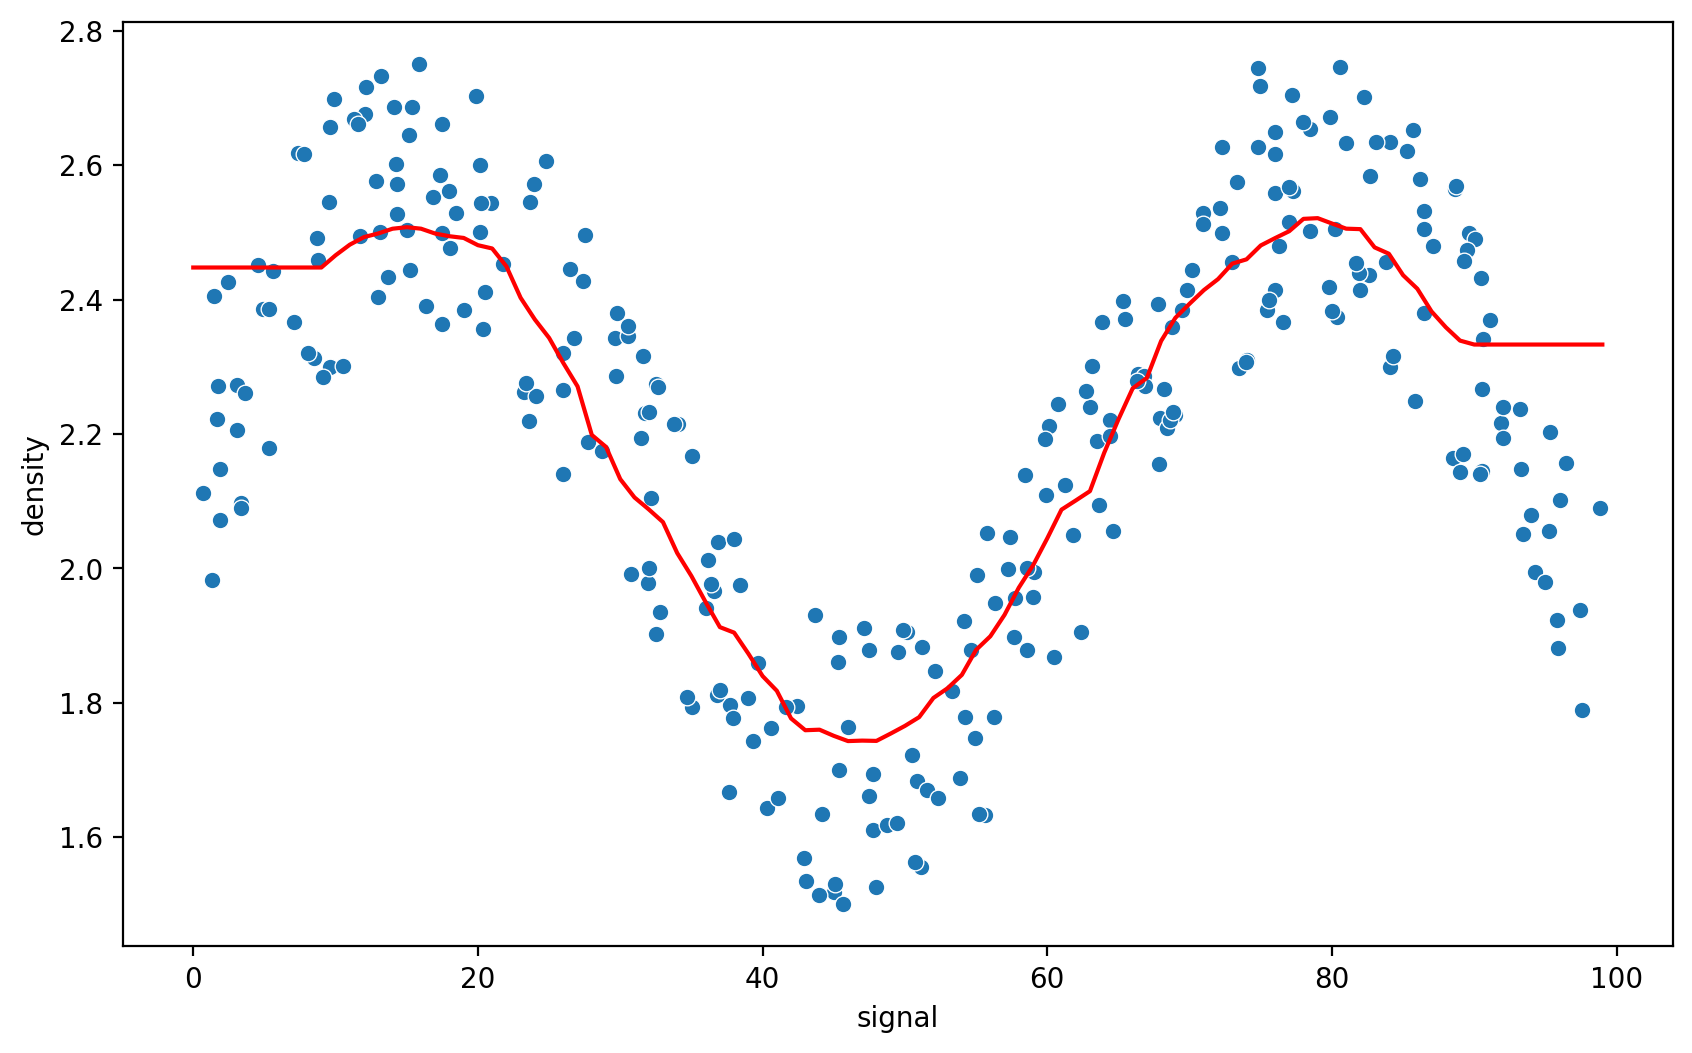

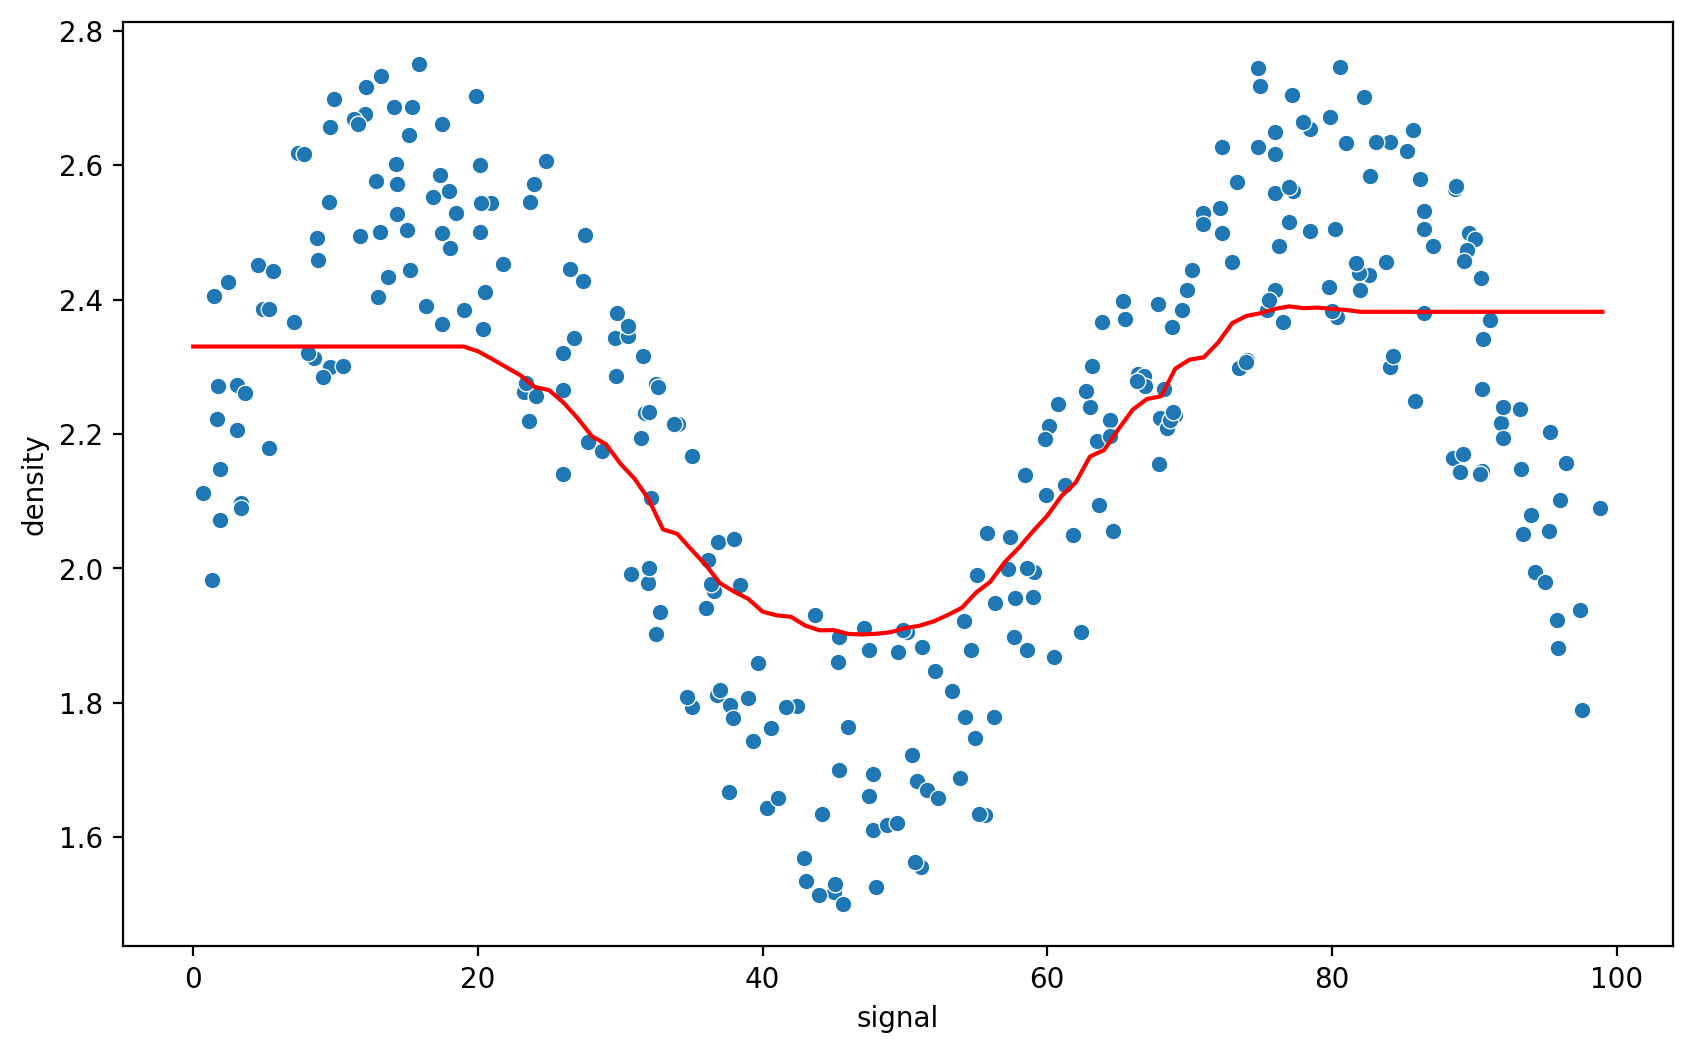

In [128]:
k_values = [1,2,5,8,10,20,50,100]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model , X_train , y_train , X_test , y_test)

## SVM

In [129]:
from sklearn.svm import SVR

In [130]:
svr = SVR()

In [131]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {'C': [0.001,0.01,0.1,0.5,1,5,10,100,500,1000],
             'gamma': ['auto' , 'scale']}

In [136]:
grid = GridSearchCV(svr , param_grid)

RMSE: 0.12678043705190253
MAE: 0.1090241095826762


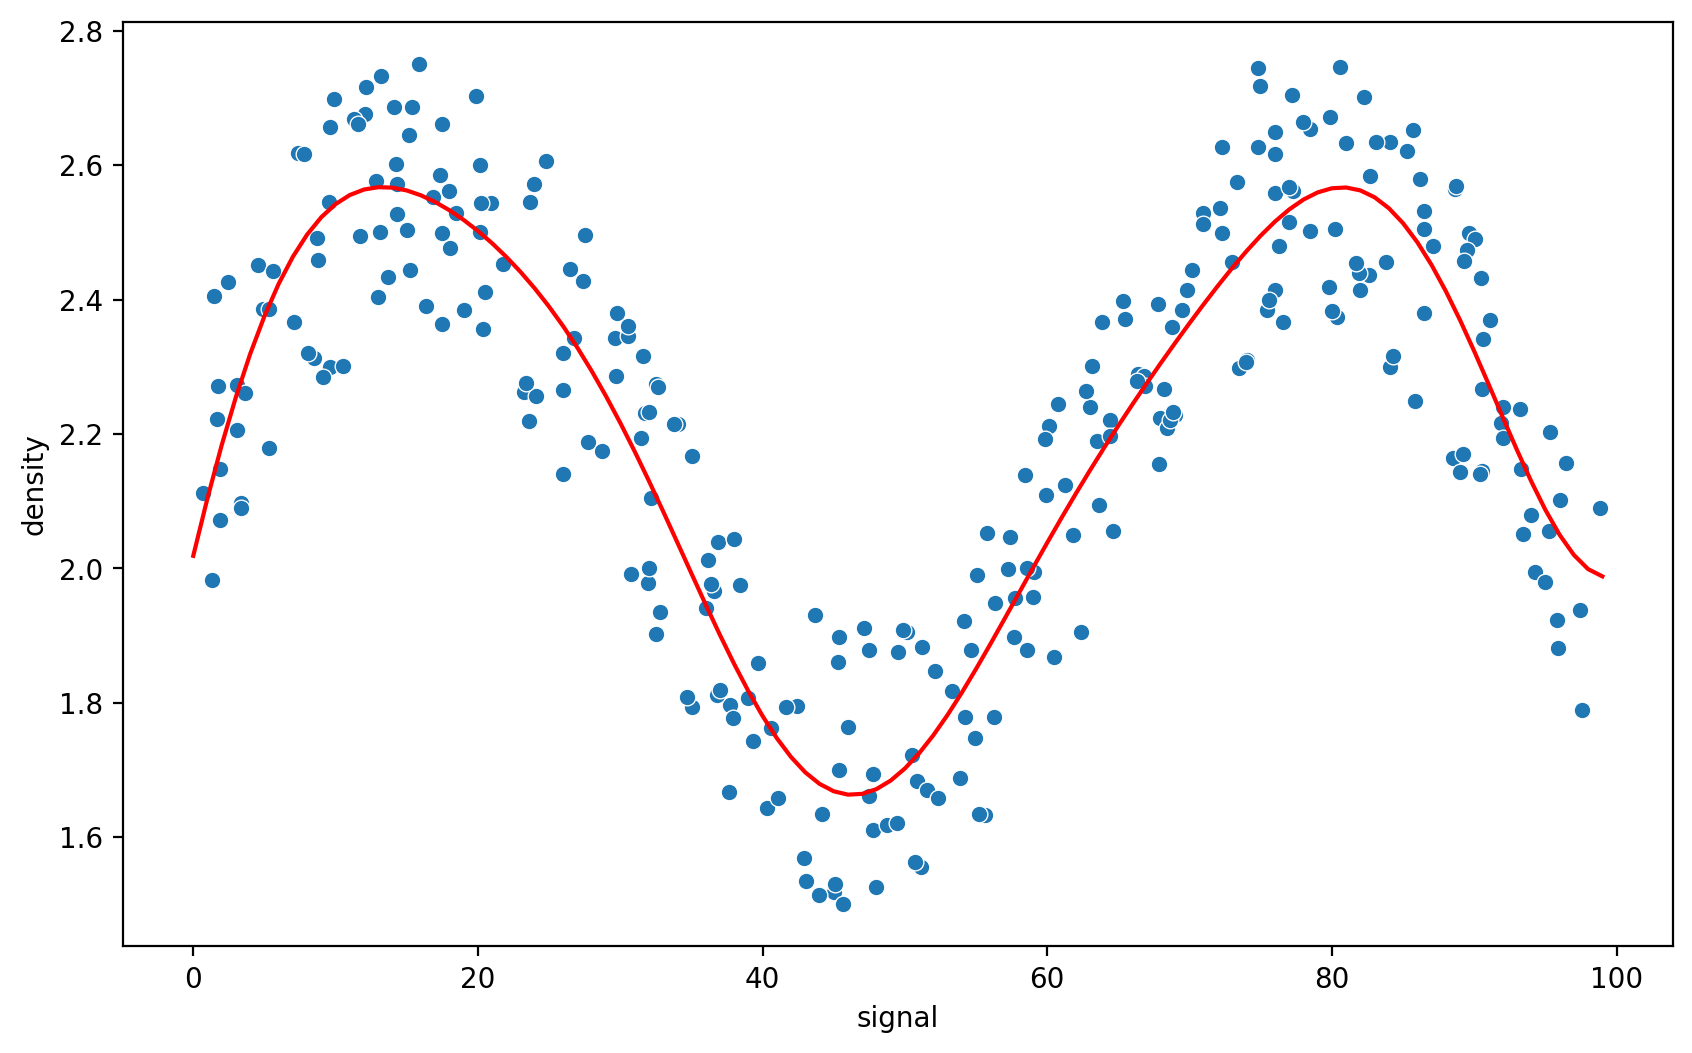

In [137]:
run_model(grid , X_train , y_train , X_test , y_test)

## DECISION TREES

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
tree = DecisionTreeRegressor()

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


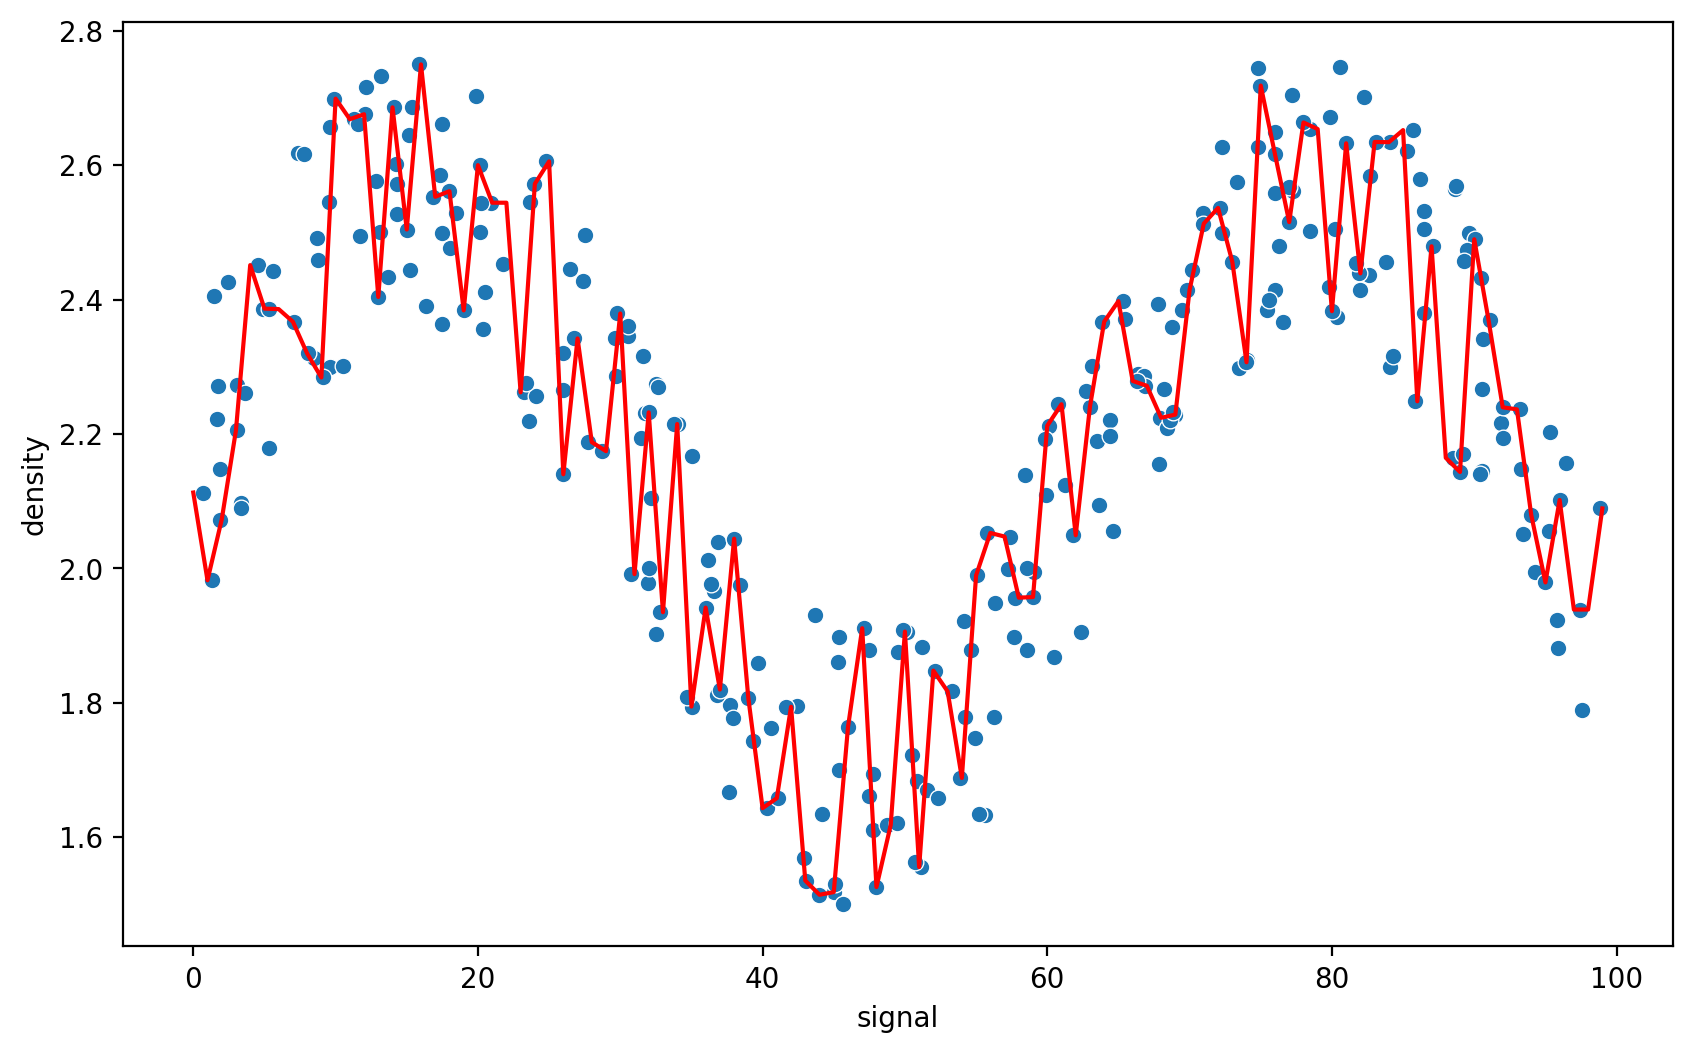

In [140]:
run_model(tree , X_train , y_train , X_test , y_test)

## RANDOM FORESTS

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
rfr = RandomForestRegressor()

In [144]:
param_grid = {'n_estimators':[10,64,128,100]}

In [145]:
grid_rfr = GridSearchCV(rfr , param_grid)

RMSE: 0.13364601433003223
MAE: 0.11037753889142131


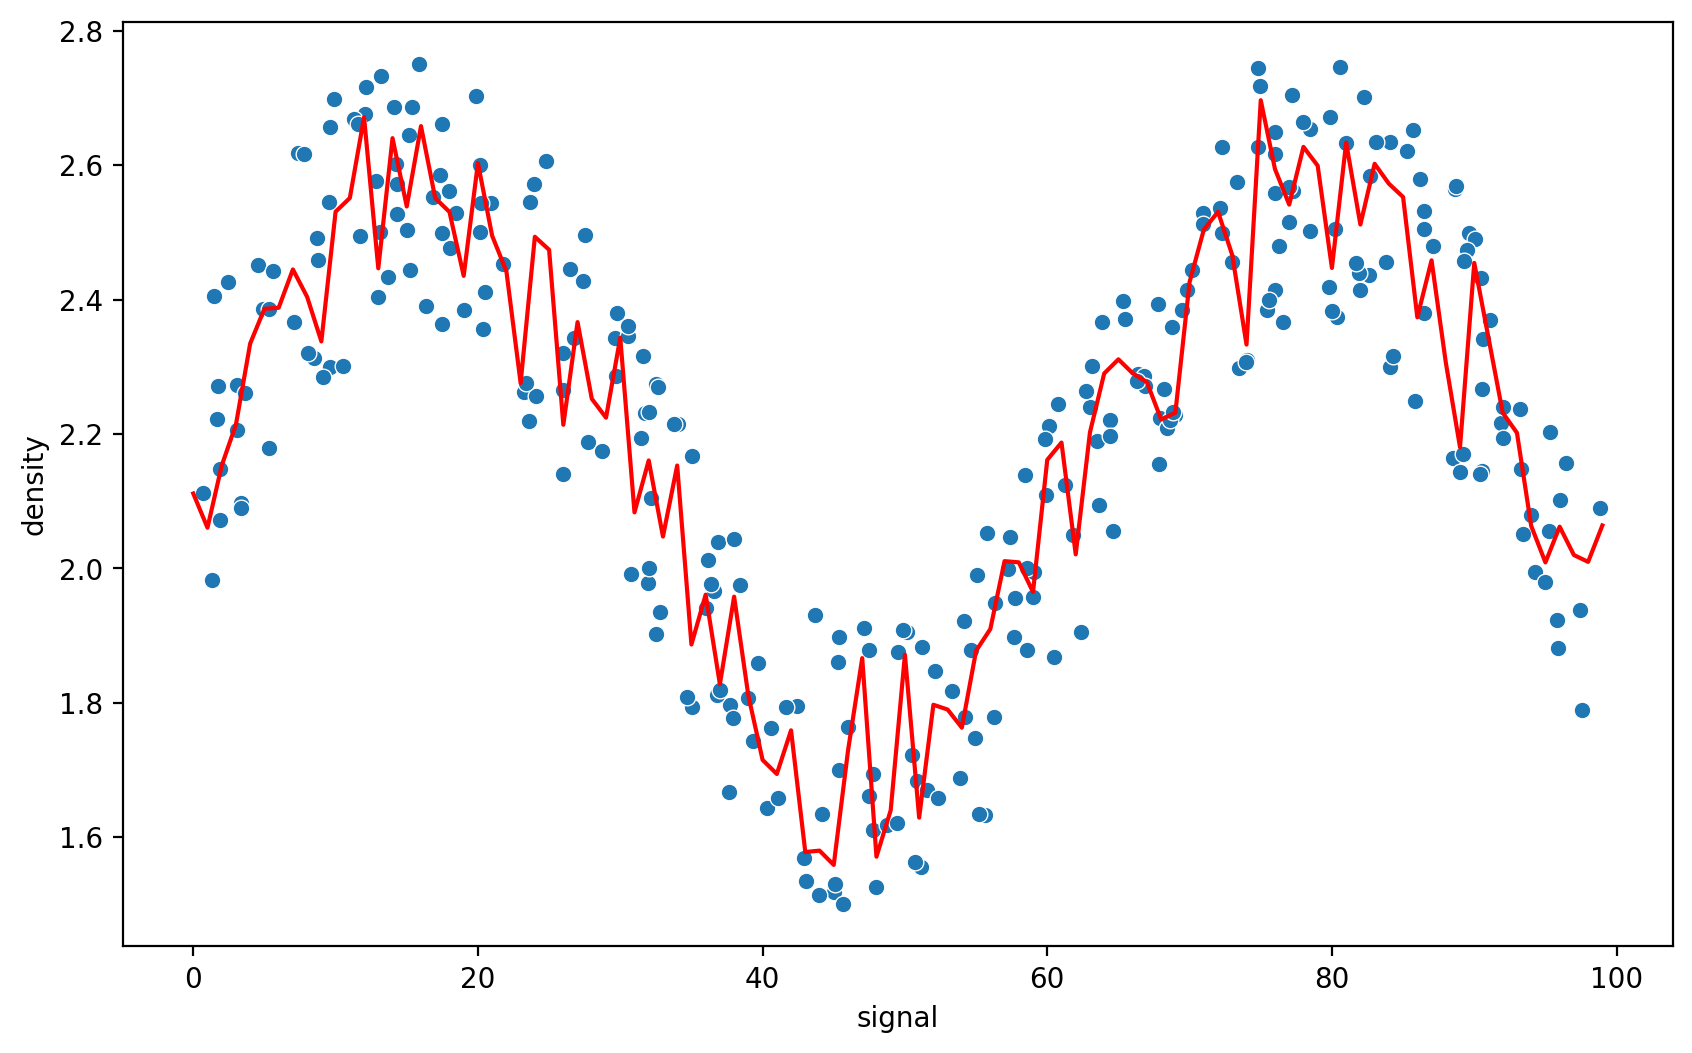

In [147]:
run_model(grid_rfr, X_train , y_train , X_test , y_test)
# in this case RANDOM FOREST will not perform well as we have only one feature